<a href="https://colab.research.google.com/github/JoanNjoki/Men-s-Fifa-prediction-analysis/blob/main/Moringa_Data_Science_CORE_W6_Independent_Project_2021_05_Joan_Mwangi_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MEN'S FIFA WORLD CUP DATA ANALYSIS


### a) The Question

In this analysis, my task is 
* to make a prediction of the game between the home away team and home team 
* to determine if the game was friendly or not

### b) Metric for Success
Using two approaches the poynomial and logistic approach, I will be able to rank the teams based on the goals scored and if it was a friendly match or not.

### c) Context 

Understanding the ranking process for fifa world cups and making predictions based on the goals scored

### d) Recording the Experimental Design

>The steps to be followed are:

 * Exploratory Data Analysis
 * Carry out any feature engineering
 * Checking for multicollinearity
 * Building the model
 * Cross-validating the model
 * Computing Root Mean Squared of Errors

### e) Data Relevance

The features within this dataset: the home team, away team, if the ground was neutral or not, the home rank and away rank are some of the features which will help in predicting the home scores, away scores and tournament type(Win,loss or draw)

## 2. Reading the Data

In [1]:
#Importing libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
import scipy as sp
import math
import seaborn as sns

In [2]:
ranking =pd.read_csv('/content/fifa_ranking.csv')
results = pd.read_csv('/content/results.csv')

# 3. Checking the Data

##Fifa ranking dataset

In [5]:
#Determining the number of records in the fifa ranking
ranking.shape

(57793, 16)

There are 57793 records, and 16 columns within the ranking dataset

In [3]:
#previewing the first five rows
ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [4]:
#previewing the last five rows
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [5]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


* There are no null values
* Rank date data type should be datetime and object

##Fifa results dataset

In [6]:
results.shape

(40839, 9)

40839 records and 9 features

In [7]:
# Previewing the first five rows 
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [8]:
# Previewing the last five rows
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [9]:
# Checking the number of non null values and datatypes of the dataset
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


No null values in the date column,however on the date column the data type should be datetime format

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation

# 5. Tidying the Dataset

## Data cleaning: Fifa ranking dataset

In [10]:
ranking.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

> Checking for outliers: Boxplots

<Figure size 648x360 with 0 Axes>

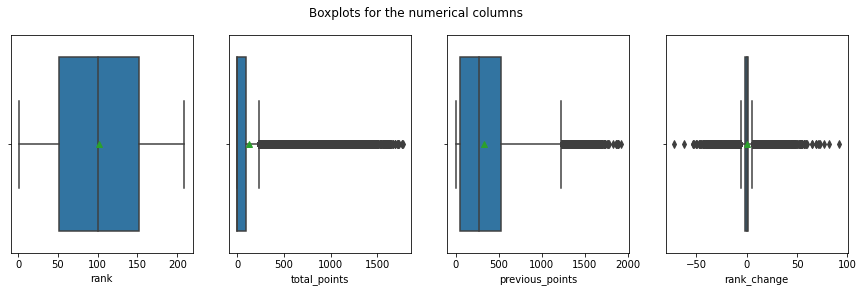

In [11]:
# checking for outliers
fig = plt.figure(figsize=(9,5),edgecolor='red')
fig,(ax1,ax2,ax3,ax4)=plt.subplots(1,4,figsize=(15,4))
fig.suptitle('Boxplots for the numerical columns')
sns.boxplot(data=ranking,x=ranking['rank'],ax=ax1,showmeans=True)
sns.boxplot(data=ranking,x=ranking['total_points'],ax=ax2,showmeans=True)
sns.boxplot(data=ranking,x=ranking['previous_points'],ax=ax3,showmeans=True)
sns.boxplot(data=ranking,x=ranking['rank_change'],ax=ax4,showmeans=True)


The total points, previous points and rank change have outliers. However they will not be dropped as they are essential in our analysis

> Checking for outliers: using IQR

In [12]:
Q1 = ranking.quantile(0.25)
Q3 = ranking.quantile(0.75)
IQR = Q3 - Q1
ranking_new = ranking[~((ranking < (Q1 - 1.5 * IQR)) | (ranking > (Q3 + 1.5 * IQR))).any(axis=1)]
print(ranking_new.shape)
print(ranking.shape)

(36577, 16)
(57793, 16)


In [13]:
# Checking for Anomalies
#by checking if there are issues with the records within the categorical columns 
#creating a list of the columns of interest
#creating a dictionary which will have the column name and the unique values
columns = ranking [['country_full','confederation']]

unique_values = {col:ranking[col].unique() for col in columns}
unique_values

{'confederation': array(['UEFA', 'CONMEBOL', 'CONCACAF', 'CAF', 'AFC', 'OFC'], dtype=object),
 'country_full': array(['Germany', 'Italy', 'Switzerland', 'Sweden', 'Argentina',
        'Republic of Ireland', 'Russia', 'Brazil', 'Norway', 'Denmark',
        'England', 'France', 'Spain', 'Mexico', 'RCS', 'Netherlands',
        'Nigeria', 'Belgium', 'Colombia', 'Poland', 'Romania', 'Uruguay',
        'Portugal', 'Cameroon', 'Zambia', 'Egypt', 'Wales', 'USA',
        "Côte d'Ivoire", 'Scotland', 'Tunisia', 'Greece', 'Morocco',
        'Algeria', 'Ecuador', 'Korea Republic', 'Bulgaria', 'Austria',
        'Costa Rica', 'Northern Ireland', 'Honduras', 'Hungary', 'Japan',
        'Saudi Arabia', 'China PR', 'Canada', 'Finland', 'Ghana', 'Chile',
        'Zimbabwe', 'Qatar', 'Australia', 'Iceland', 'IR Iran',
        'United Arab Emirates', 'Yugoslavia', 'Iraq', 'Senegal', 'Bolivia',
        'Kuwait', 'Korea DPR', 'El Salvador', 'Turkey', 'Gabon', 'Guinea',
        'Thailand', 'Paraguay', 'Mala

In [14]:
# checking for missing data
# there are no null values
ranking.isnull().sum().sum()

0

In [15]:
ranking.duplicated().sum()

37

* There are 37 duplicated values within the dataset

In [16]:
#dropping duplicates
ranking = ranking.drop_duplicates()
#confirming they were dropped
ranking.duplicated().any()

False

## Data Cleaning:Fifa results dataset

In [17]:
#checking for outliers
Q1 = results.quantile(0.25)
Q3 = results.quantile(0.75)
IQR = Q3 - Q1
results_out = results[~((ranking < (Q1 - 1.5 * IQR)) | (ranking > (Q3 + 1.5 * IQR))).any(axis=1)]
print(results_out.shape)
print(results.shape)


(40839, 9)
(40839, 9)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


There are no outliers and duplicates

In [22]:
#checking for duplicates
results.duplicated().sum()

0

No duplicates

In [18]:
results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [19]:
#checking for uniques values to detect anomalies within the dataset
columns = results [['home_team','away_team','tournament','city']]

unique_values = {col:results[col].unique() for col in columns}
unique_values

{'away_team': array(['England', 'Scotland', 'Wales', 'Northern Ireland', 'Canada',
        'Argentina', 'Hungary', 'Czechoslovakia', 'Uruguay', 'France',
        'Austria', 'Switzerland', 'Netherlands', 'Belgium', 'Germany',
        'Norway', 'Sweden', 'Italy', 'Chile', 'Catalonia', 'Finland',
        'Russia', 'Luxembourg', 'Denmark', 'Brazil', 'Basque Country',
        'United States', 'Philippines', 'Estonia', 'Provence',
        'El Salvador', 'Costa Rica', 'Paraguay', 'Yugoslavia', 'Poland',
        'Portugal', 'Spain', 'Romania', 'Australia', 'Central Spain',
        'Mexico', 'Galicia', 'Brittany', 'Asturias', 'China PR',
        'New Zealand', 'Latvia', 'Guatemala', 'Curaçao', 'Bulgaria',
        'Lithuania', 'Turkey', 'Egypt', 'South Africa', 'Jamaica', 'Japan',
        'Republic of Ireland', 'Uganda', 'Bolivia', 'Haiti',
        'Trinidad and Tobago', 'Kenya', 'Ukraine', 'Honduras', 'Nicaragua',
        'Greece', 'Guyana', 'Peru', 'Aruba', 'Martinique', 'Barbados',
        'C

In [20]:
#checking if the home team is similar to country
x = results['home_team'] == results['country']
x.value_counts()

True     29938
False    10901
dtype: int64

They are not eniterly similar, the home team(name of the team often based on the country) but it gives us insights that this difference could differentiate the home rank and the away rank

>changing the dates to datetime for both datasets

In [21]:
#Ranking dataset
ranking['rank_date'] = pd.to_datetime(ranking['rank_date'])
ranking['year'] = ranking['rank_date'].dt.year
#dropping the ranking date column
ranking = ranking.drop(columns=['rank_date'],axis=1)

In [22]:
#results dataset
results['date'] = pd.to_datetime(results['date'])
results['year'] = results['date'].dt.year
#dropping the ranking date column
#results = ranking.drop(columns=['date'],axis=1)

In [23]:
#which are the unique values within the year columns for both datasets
ranking.year.value_counts()

2017    2532
2016    2518
2014    2508
2015    2508
2013    2508
2012    2501
2007    2489
2011    2484
2009    2484
2008    2484
2005    2461
2004    2455
2003    2450
2001    2436
2000    2429
1999    2416
2010    2277
2006    2259
2002    2233
1998    1938
1997    1916
1996    1847
1995    1792
1994    1728
2018    1266
1993     837
Name: year, dtype: int64

In [24]:
#value counts for year column in results dataset
results.year.value_counts()

2008    1091
2011    1081
2004    1064
2000    1026
2001    1018
        ... 
1877       2
1875       1
1874       1
1872       1
1873       1
Name: year, Length: 148, dtype: int64

* The years in the ranking dataset dont have records beyond 1993

In [25]:
#creating a new dataset with records of 1993 and above for results dataset
results_new = results[results['year'] > 1992]
results_new['year'].unique

<bound method Series.unique of 17361    1993
17362    1993
17363    1993
17364    1993
17365    1993
         ... 
40834    2019
40835    2019
40836    2019
40837    2019
40838    2019
Name: year, Length: 23478, dtype: int64>

In [26]:
results_new.shape

(23478, 10)

> Inner join,matching only values similar to both datasets to obtain a home_team rank column

In [27]:
#merging the two datasets
home_data = pd.merge(ranking,results, how='inner' ,left_on=['year','country_full'],right_on=['year','home_team'])
home_data.rename({'rank':'home_rank'},axis=1,inplace=True)
home_data= home_data.drop(columns=['country_abrv','cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'cur_year_avg','three_year_ago_avg',
       'three_year_ago_weighted'],axis=1)
home_data.head(2)


,home_rank,country_full,total_points,previous_points,rank_change,confederation,year,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1,Germany,0.0,57,0,UEFA,1993,1993-04-14,Germany,Ghana,6,1,Friendly,Bochum,Germany,False
1,1,Germany,0.0,57,0,UEFA,1993,1993-10-13,Germany,Uruguay,5,0,Friendly,Karlsruhe,Germany,False


> Second inner join in order to create away_rank

In [28]:
#merging the two datasets
away_data = pd.merge(ranking,results, how='inner' ,left_on=['year','country_full'],right_on=['year','away_team'])
away_data.rename({'rank':'away_rank'},axis=1,inplace=True)
away_data = away_data.drop(columns=['country_abrv','cur_year_avg_weighted','cur_year_avg', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
      'three_year_ago_weighted'],axis=1)
away_data.head()


,away_rank,country_full,total_points,previous_points,rank_change,confederation,year,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1,Germany,0.0,57,0,UEFA,1993,1993-03-24,Scotland,Germany,0,1,Friendly,Glasgow,Scotland,False
1,1,Germany,0.0,57,0,UEFA,1993,1993-06-10,Brazil,Germany,3,3,USA Cup,Washington,United States,True
2,1,Germany,0.0,57,0,UEFA,1993,1993-06-13,United States,Germany,3,4,USA Cup,Chicago,United States,False
3,1,Germany,0.0,57,0,UEFA,1993,1993-06-19,England,Germany,1,2,USA Cup,Pontiac,United States,True
4,1,Germany,0.0,57,0,UEFA,1993,1993-09-22,Tunisia,Germany,1,1,Friendly,Tunis,Tunisia,False


In [29]:
#Merging the two datasets 
fifa= pd.merge(home_data,away_data, how='inner' ,left_on=['year','country_full'],right_on=['year','country_full'])
fifa.head(2)


,home_rank,country_full,total_points_x,previous_points_x,rank_change_x,confederation_x,year,date_x,home_team_x,away_team_x,home_score_x,away_score_x,tournament_x,city_x,country_x,neutral_x,away_rank,total_points_y,previous_points_y,rank_change_y,confederation_y,date_y,home_team_y,away_team_y,home_score_y,away_score_y,tournament_y,city_y,country_y,neutral_y
0,1,Germany,0.0,57,0,UEFA,1993,1993-04-14,Germany,Ghana,6,1,Friendly,Bochum,Germany,False,1,0.0,57,0,UEFA,1993-03-24,Scotland,Germany,0,1,Friendly,Glasgow,Scotland,False
1,1,Germany,0.0,57,0,UEFA,1993,1993-04-14,Germany,Ghana,6,1,Friendly,Bochum,Germany,False,1,0.0,57,0,UEFA,1993-06-10,Brazil,Germany,3,3,USA Cup,Washington,United States,True


In [51]:
#fifa = fifa.drop(columns=['total_points_x','previous_points_x',
       'rank_change_x', 'confederation_x','date_x', 'home_team_x',
       'away_team_x', 'home_score_x', 'away_score_x', 'tournament_x', 'city_x','city_y', 'date_x','date_y'],axis=1)

In [32]:
#Null values
fifa.isnull().sum().sum()

0

No null values in the new merged dataset(Fifa)

In [39]:
#checking for duplicates
#fifa.duplicated().sum()
fifa = fifa.drop_duplicates()
fifa.duplicated().any()
fifa.shape

(2988822, 17)

The fifa dataset has 2988822 records and 17 columns

In [48]:
fifa.columns

Index(['home_rank', 'country_full', 'year', 'country_x', 'neutral_x',
       'away_rank', 'total_points_y', 'previous_points_y', 'rank_change_y',
       'confederation_y', 'home_team_y', 'away_team_y', 'home_score_y',
       'away_score_y', 'tournament_y', 'country_y', 'neutral_y'],
      dtype='object')

In [74]:
#renaming column names and dropping repeating columns
#fifa.columns = fifa.columns.str.rstrip('_y')
#fifa.rename(columns={'country_full':'country','ear':'year'})
#fifa = fifa.drop(columns=['country_x','neutral_x'],axis=1)
fifa.head(2)

,home_rank,year,away_rank,total_points,previous_points,rank_change,confederation,home_team,away_team,home_score,away_score,tournament,neutral
0,1,1993,1,0.0,57,0,UEFA,Scotland,Germany,0,1,Friendly,False
1,1,1993,1,0.0,57,0,UEFA,Brazil,Germany,3,3,USA Cup,True


## 6. Exploratory Analysis

#Univariate analysis

> ### Histograms

Text(0.5, 1.0, 'rank')

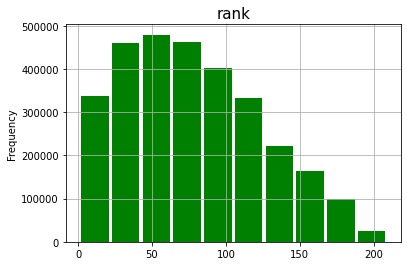

In [44]:
#plotting histogram for ranks
fifa['home_rank'].plot.hist(grid=True, bins=10, rwidth=0.9, color='green')
plt.title('rank',fontsize=15)

Text(0.5, 1.0, 'rank')

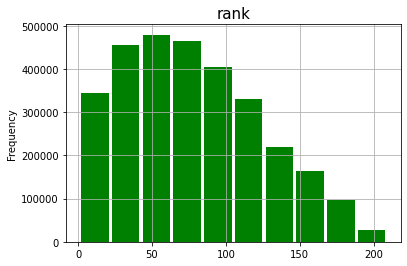

In [45]:
#plotting histogram for away rank
fifa['away_rank'].plot.hist(grid=True, bins=10, rwidth=0.9, color='green')
plt.title('rank',fontsize=15)

Text(0.5, 1.0, 'Total points')

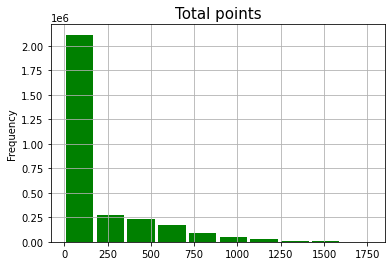

In [47]:
fifa['total_points_y'].plot.hist(grid=True, bins=10, rwidth=0.9,
                   color='green')
plt.title('Total points',fontsize=15)

Text(0.5, 1.0, 'Previous points')

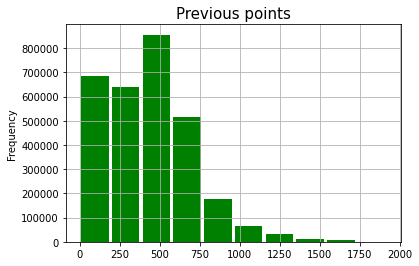

In [67]:
fifa['previous_points'].plot.hist(grid=True, bins=10, rwidth=0.9,
                   color='green')
plt.title('Previous points',fontsize=15)

Text(0.5, 1.0, 'Home score points')

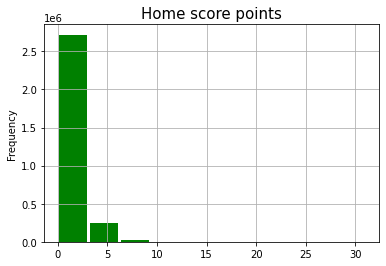

In [68]:
fifa['home_score'].plot.hist(grid=True, bins=10, rwidth=0.9,
                   color='green')
plt.title('Home score points',fontsize=15)

Text(0.5, 1.0, 'Away score points')

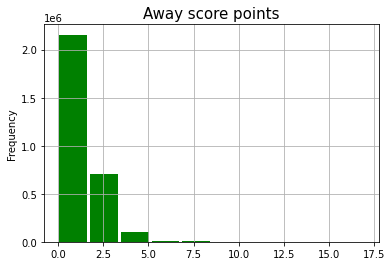

In [69]:
fifa['away_score'].plot.hist(grid=True, bins=10, rwidth=0.9,
                   color='green')
plt.title('Away score points',fontsize=15)

> ### Barplots

Text(0.5, 1.0, 'Confederation')

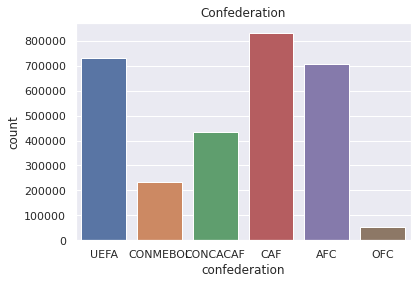

In [70]:
sns.set_theme(style='darkgrid')
sns.countplot(x='confederation',data=fifa)
plt.title('Confederation',fontsize=12)

Text(0.5, 1.0, 'Neutral')

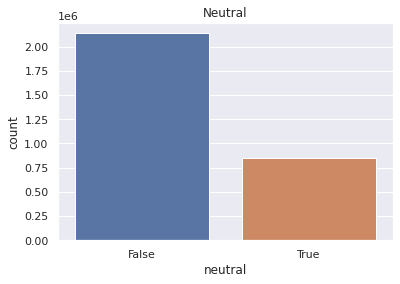

In [71]:
sns.set_theme(style='darkgrid')
sns.countplot(x='neutral',data=fifa)
plt.title('Neutral',fontsize=12)
#from this countplot, majority of the grounds used for games were not 
#a neutral ground

> ### Frequency Tables

In [75]:
#home United States has a record of46235
#with the least Mynamar and Sint Martin
fifa.home_team.value_counts()

United States    46235
Mexico           43358
Saudi Arabia     40655
Japan            37736
Qatar            37466
                 ...  
Mayotte            132
Palau               72
Timor-Leste         72
Myanmar             50
Sint Maarten        22
Name: home_team, Length: 238, dtype: int64

In [76]:
#away teams with the highest is Iraq
#with the least being Gibraltar
fifa.away_team.value_counts()

Iraq                        65996
Bahrain                     42682
Zambia                      42004
Kuwait                      41686
Jamaica                     39006
                            ...  
Turks and Caicos Islands      408
Montserrat                    291
Myanmar                        96
Timor-Leste                    64
Gibraltar                      60
Name: away_team, Length: 195, dtype: int64

> ### Skewness

In [78]:
#skewness in the numerical columns
columns = fifa [['home_rank','away_rank','total_points','previous_points','rank_change']]

y = {col:fifa[col].skew() for col in columns}
y
# values in previous points column is moderately skewed
#rank is fairly symmetrical
#total points and rank change is highly skewed

{'away_rank': 0.4282936775062564,
 'home_rank': 0.4258956782626513,
 'previous_points': 0.6503918467563805,
 'rank_change': 1.155118404886759,
 'total_points': 1.9047542995815763}

In [80]:
columns = fifa [['home_rank','away_rank','total_points','previous_points','rank_change']]

y = {col:fifa[col].kurt() for col in columns}
y
#rank column is platykurtic(negative distribution)
#rank change, total points,previous points is leptokurtic(postive distribution)


{'away_rank': -0.588612004532139,
 'home_rank': -0.593471692003428,
 'previous_points': 0.8443366769798213,
 'rank_change': 14.303508100300238,
 'total_points': 3.30799774486666}

### Observations
* 

## Bivariate Analysis

> ### Correlation matrix

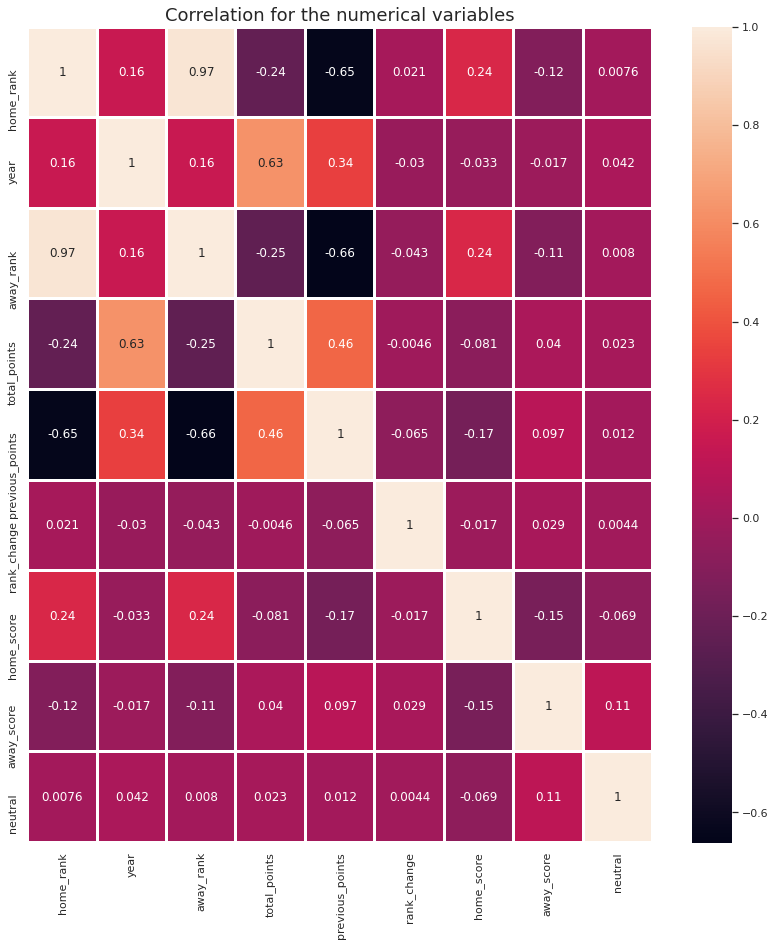

In [81]:
corr = fifa.corr()
plt.figure(figsize=(14,15))
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidth=2.0,annot=True)
plt.title('Correlation for the numerical variables',fontsize=18)
plt.show()

* Home rank and year change have a high correlation

## 7. Implementing the Solution

## Feature Engineering

### Creating new columns
 which will rate the game based on the home team's perspective as:
* Win
* Loss
* Draw

In [82]:
#creating a column based on the home team's perspective if the
#scores are a win, loss or draw
def score_rating(cols):
  home_score = cols[0]
  away_score = cols[1]
  if home_score > away_score:
        return 'Win'
  elif home_score < away_score:
        return 'Loss'
  else:
        return 'Draw'
      
fifa['status'] = fifa[['home_score','away_score']].apply( score_rating,axis=1)
    

In [83]:
#confirming the values within the status column
fifa['status'].unique()

array(['Loss', 'Draw', 'Win'], dtype=object)

In [86]:
#finding the unique varaibles within the tournament column
fifa['tournament'].nunique()

69

In [87]:
def game_type(cols):
  tournament= cols[0]
  if tournament == 'Fifa World Cup':
        return 'World Cup'
  elif tournament == 'Friendly':
        return 'Friendly'
  else:
        return 'Other'
      
fifa['tournament_type'] = fifa[['tournament']].apply( game_type,axis=1)
#previewing the changes made
fifa.head(2)  

,home_rank,year,away_rank,total_points,previous_points,rank_change,confederation,home_team,away_team,home_score,away_score,tournament,neutral,status,tournament_type
0,1,1993,1,0.0,57,0,UEFA,Scotland,Germany,0,1,Friendly,False,Loss,Friendly
1,1,1993,1,0.0,57,0,UEFA,Brazil,Germany,3,3,USA Cup,True,Draw,Other


In [88]:
#dropping the tournament column
fifa = fifa.drop(columns=['tournament'],axis=1)

### Label encoding categorical variables

In [90]:
#changing the varaibles to dummy variables
from sklearn.preprocessing import LabelEncoder
labelencode = LabelEncoder()
fifa['tournament_type'] = labelencode.fit_transform(fifa['tournament_type'])
fifa['neutral'] = labelencode.fit_transform(fifa['neutral'])


In [92]:
#viewing the changes
fifa.head(2)

,home_rank,year,away_rank,total_points,previous_points,rank_change,confederation,home_team,away_team,home_score,away_score,neutral,status,tournament_type
0,1,1993,1,0.0,57,0,UEFA,Scotland,Germany,0,1,0,Loss,0
1,1,1993,1,0.0,57,0,UEFA,Brazil,Germany,3,3,1,Draw,1


###Polynomial Approach

##Multicollinearity

In [93]:
corr = fifa.corr()
pd.DataFrame(np.linalg.inv(corr.values),index=corr.index,columns=corr.columns)

,home_rank,year,away_rank,total_points,previous_points,rank_change,home_score,away_score,neutral,tournament_type
home_rank,18.267491,-0.149615,-17.669636,0.000745,0.046442,-1.132085,-0.154607,0.081362,-0.005594,-0.012310
year,-0.149615,2.592126,-1.505702,-1.427431,-1.284770,-0.072632,0.154228,0.065623,-0.052606,0.067396
away_rank,-17.669636,-1.505702,20.027925,0.769473,2.044070,1.305445,-0.183645,-0.053432,0.001162,-0.126924
total_points,0.000745,-1.427431,0.769473,2.072050,0.019624,0.001215,-0.062085,-0.030100,0.012404,-0.059730
previous_points,0.046442,-1.284770,2.044070,0.019624,2.812844,0.230994,-0.075833,-0.074313,0.009617,-0.029413
rank_change,-1.132085,-0.072632,1.305445,0.001215,0.230994,1.093254,0.009763,-0.034121,0.002107,-0.026659
home_score,-0.154607,0.154228,-0.183645,-0.062085,-0.075833,0.009763,1.092001,0.129583,0.060902,-0.013942
away_score,0.081362,0.065623,-0.053432,-0.030100,-0.074313,-0.034121,0.129583,1.047181,-0.106479,-0.040938
neutral,-0.005594,-0.052606,0.001162,0.012404,0.009617,0.002107,0.060902,-0.106479,1.039064,-0.144868
tournament_type,-0.012310,0.067396,-0.126924,-0.059730,-0.029413,-0.026659,-0.013942,-0.040938,-0.144868,1.034105


There is no alarming multicollinearlity among the variables

##Building a polynomial regression model

###Predicting home away score

In [152]:
#changing the varaibles to dummy variables
from sklearn.preprocessing import LabelEncoder
labelencode = LabelEncoder()
fifa['home_team'] = labelencode.fit_transform(fifa['home_team'])
fifa['away_team'] = labelencode.fit_transform(fifa['away_team'])
fifa['tournament_type'] = labelencode.fit_transform(fifa['tournament_type'])

In [153]:
#exporting the clean dataset to avoid repeating the clean process
fifa.to_csv('men_fifa.csv')
fifa.head(2)

,home_rank,year,away_rank,total_points,previous_points,rank_change,confederation,home_team,away_team,home_score,away_score,neutral,status,tournament_type
0,1,1993,1,0.0,57,0,UEFA,184,70,0,1,0,Loss,0
1,1,1993,1,0.0,57,0,UEFA,30,70,3,3,1,Draw,1


In [207]:
# training the model using three columns away_rank,home_rank and tournament type
#predictor variable: home team scores
X = fifa.iloc[:,[0,2,13]].values
y = fifa.iloc[:,9].values


In [208]:
#splitting the two datasets into train and test sets

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=400,test_size=0.2)
#stating a random number represents the number of times the code will run without bringing different results
# the test size shows that
#20% will be used for testing while 80% for training

#scaling the dataset using standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
# Fit polynomial Regression to the dataset
features = PolynomialFeatures(degree = 3) 
X_train= features.fit_transform(X_train)
X_test = features.fit_transform(X_test)


regression = LinearRegression()
regression.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [209]:
#predictions 
y_pred = poly_new.predict(X_test)
#computing the RMSE score
from sklearn.metrics import mean_squared_error
print('RMSE SCORE: ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('Mean of y:',y.mean())
print('Standard deviation:',y.std())
#comparing the mean of y[Status] is lower than RMSE with a +/- (~1.4 standard deviations)

RMSE SCORE:  1.5854275413362873
Mean of y: 1.5280481741636003
Standard deviation: 1.478361288146029


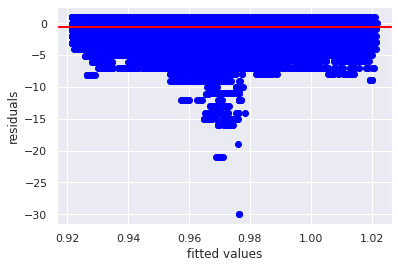

In [210]:
#plotting a residual plot
residuals = np.subtract(y_pred,y_test)
plt.scatter(y_pred,residuals,color='blue')
plt.ylabel('residuals')
plt.xlabel('fitted values')
plt.axhline(y = residuals.mean(),color='red',linewidth=2)

Some of the values are around 0, and residual mean is close to 0

###Heteroscedasticity using the bartlett's test

In [211]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value
value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(value)

if test_result > p_value:
  print('The variance is unequal')
else:
    print('The variance is homogenous')

inf
The variance is unequal


###Predicting using away_score

In [256]:
# training the model using three columns away_rank,home_rank and tournament type
#predictor variable: away team scores
X = fifa.iloc[:,[0,2,13]].values
y = fifa.iloc[:,10].values

In [257]:
#splitting the two datasets into train and test sets

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=400,test_size=0.2)
#stating a random number represents the number of times the code will run without bringing different results
# the test size shows that
#20% will be used for testing while 80% for training

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
# Fit polynomial Regression to the dataset
features = PolynomialFeatures(degree = 3) 
X_train= features.fit_transform(X_train)
X_test = features.fit_transform(X_test)


regression = LinearRegression()
regression.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [220]:
#predictions 
y_pred = poly_new.predict(X_test)
#computing the RMSE score
from sklearn.metrics import mean_squared_error
print('RMSE SCORE: ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('Mean of y:',y.mean())
print('Standard deviation:',y.std())

RMSE SCORE:  1.4392725018972234
Mean of y: 1.0736935822876037
Standard deviation: 1.2667676467125037


RMSE score is higher than mean of y.

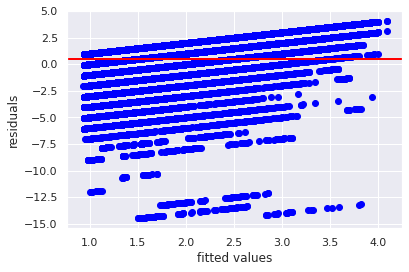

In [221]:
#plotting a residual plot
residuals = np.subtract(y_pred,y_test)
plt.scatter(y_pred,residuals,color='blue')
plt.ylabel('residuals')
plt.xlabel('fitted values')
plt.axhline(y = residuals.mean(),color='red',linewidth=2)

In [223]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value
value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(value)

if test_result > p_value:
  print('The variance is unequal')
else:
    print('The variance is homogenous')

inf
The variance is unequal


###Logistic Regression

In [225]:
fifa.head(0)

,home_rank,year,away_rank,total_points,previous_points,rank_change,confederation,home_team,away_team,home_score,away_score,neutral,status,tournament_type


In [237]:
#building a logistic regression model
X = fifa.iloc[:,[0,1,2,7,8,9,10,13]].values
y =fifa.iloc[:,12].values

In [234]:
#confirming if i have highlighted the right columns
print(X.head())

   home_rank  year  away_rank  ...  home_score  away_score  tournament_type
0          1  1993          1  ...           0           1                0
1          1  1993          1  ...           3           3                1
2          1  1993          1  ...           3           4                1
3          1  1993          1  ...           1           2                1
4          1  1993          1  ...           1           1                0

[5 rows x 8 columns]


In [238]:
#confirming i have the right columns
print(y.head())

0    Loss
1    Draw
2    Loss
3    Loss
4    Draw
Name: status, dtype: object


In [240]:
#splitting the two datasets
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=45,test_size=0.3)

from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [242]:
y_pred = regressor.predict(X_test)
from sklearn.metrics import accuracy_score
print('The accuracy of the model is:',accuracy_score(y_test,y_pred))

The accuracy of the model is: 0.8823773458228266


Based on the results our model has predicted that 88 of status(Win,loss,or draw) can be explained by the home rank, away rank, year, home team score, away team score, and tournament type(World cup, Friendly or other)

###Cross Validating the model using KFolds

In [275]:
#using the Home away scores
X = fifa.iloc[:,[0,2,13]].values
y = fifa.iloc[:,10].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=400,test_size=0.2)

from sklearn.model_selection import KFold
#using folds as 10
folds = KFold(n_splits=10)
print('using:', str(folds.get_n_splits(X))+ 'folds')

creating an empty array
RMSE = []
count = 1
for train_index,test_index in folds.split(X):
  print('\n Training model ' + str(count))
  
  X_train,X_test = X[train_index],X[test_index]
  y_train,y_test = y[train_index],y[test_index]
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
RMSE.append(rmse)
print('Model'+ str(count)+ 'Root Mean Squared Errors',rmse)

using: 10folds


## 8. Challenging the solution: Logistic Regression 

In [271]:
# Reviewing the Solution using Line
#
X = fifa[['home_rank','away_rank','tournament_type']].values
y = fifa['status'].values
#splitting the two datasets
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=45,test_size=0.3)

from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [272]:
#predicting the accuracy
y_pred = regressor.predict(X_test)
from sklearn.metrics import accuracy_score
print('The accuracy of the model is:',accuracy_score(y_test,y_pred))

The accuracy of the model is: 0.4896598103824582


> Challenging the solution using home rank, away rank and tournament type to predict the status and the accuracy score was 48.97%, lower than what was gotten earlier

## 9. Follow up questions

### a). Did we have the right data?

The results and the ranking dataset had columns that were inconsistent. In particular, if the ranking dataset had records beyond 1993 the model could have attained a higher prediction.

### b). Do we need other data to answer our question?

The data answers the question,the features related with the objectives of the data analysis. Adding other factors like the weather patterns/ seasons of the match or the buzz in social media on the team's likelihood to win or lose could be features to assess in our dataset.

### c). Did we have the right question?

 Making a prediction of home teams scores and away scores explains what factors could come to play in achieving those scores. The win, loss and draw status  depend on the year, home team rank, away team rank and their scores. 